In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

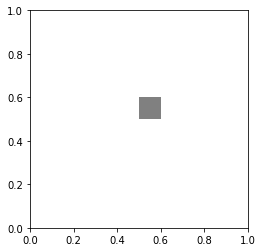

In [2]:
someX, someY = 0.5, 0.5
fig,ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(patches.Rectangle((0.5, 0.5), 0.1, 0.1,
                      alpha=1, facecolor='gray'))

In [3]:
import sys
sys.path.append("convnet-drawer/")

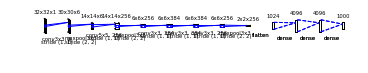

In [4]:
from convnet_drawer import Model, Conv2D, MaxPooling2D, Flatten, Dense
from matplotlib_util import save_model_to_file
channel_scale = 1/5

model = Model(input_shape=(32, 32, 1))
model.add(Conv2D(6, (3, 3), (1, 1)))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), padding="same"))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), padding="same"))
model.add(Conv2D(384, (3, 3), padding="same"))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096))
model.add(Dense(4096))
model.add(Dense(1000))

# save as svg file
model.save_fig("example.svg")



# save via matplotlib
save_model_to_file(model, "example.pdf")

model

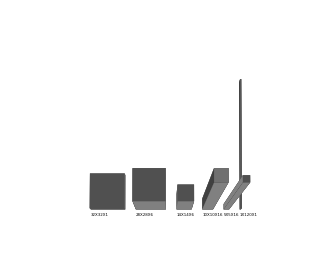

In [206]:
##### from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data(o, size=(1,1,1)):
    # code taken from
    # https://stackoverflow.com/a/35978146/4124317
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return np.array(x), np.array(y), np.array(z)

def plotCubeAt(pos=(0,0,0), size=(1,1,1), ax=None,**kwargs):
    # Plotting a cube element at position pos
    if ax !=None:
        X, Y, Z = cuboid_data( pos, size )
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, **kwargs)

sizes = [(32,32,1), (28, 28, 6), (14, 14, 6), (10, 10, 16), (5, 5, 16), (1, 120, 1)]
positions = [(0, 0, 0)]*len(sizes)
for i in range(1, len(sizes)):
    positions[i] = (positions[i-1][0] + sizes[i-1][0]+10, 0, 0)
colors = ["grey"]*len(sizes)


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(84, -90)
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_xlabel('X')
ax.set_xlim(-5, positions[-1][0]+10)
ax.set_ylabel('Y')
ax.set_ylim(-1, 130)
ax.set_zlabel('Z')
ax.set_zlim(-1, 5)
#ax.set_visible(False)
for p,s,c in zip(positions,sizes,colors):
    plotCubeAt(pos=p, size=s, ax=ax, color=c)
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])

for i in range(len(positions)):
    ax.text(positions[i][0], -5, 0, "X".join(str(x) for x in sizes[i]), color='black', fontsize=4)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
fig.tight_layout()
plt.tight_layout()
plt.savefig("lenet.pdf", bbox_inches="tight", transparent=True, dpi=600)